In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import time

In [2]:
def read(name):
    return pd.read_csv(name + '.csv', header=None)


def getcol(data, c):
    col = []
    var = data.shape[0]
    for i in range(0, data.shape[0]):
        col.append(data[i][c])
    return col


def split(data, op):
    # specific to question 1. add cases accordingly
    x1 = data[0:, 0]
    x2 = data[0:, 1]
    y = op[0:, 0]
    return x1, x2, y


def split1(data):
    x1 = data[0:, 0]
    x2 = data[0:, 1]
    y = data[:, 2]
    return x1, x2, y

def Normalize(data):
    mean = np.ones(data.shape[1])
    sdev = np.ones(data.shape[1])
    for i in range(0, data.shape[1]):
        mean[i] = np.mean(data.transpose()[i])
        sdev[i] = np.std(data.transpose()[i])
        for j in range(0, data.shape[0]):
            data[j][i] = (data[j][i] - mean[i]) / sdev[i]
    return data


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import time

X_train = read('training_feature_matrix')
Y_train = read('training_output')
X_test = read('test_feature_matrix')
Y_test = read('test_output')
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)
X_test = np.asarray(X_test)
Y_test = np.asarray(Y_test)

X_train = Normalize(X_train)
Y_train = Normalize(Y_train)
X_test = Normalize(X_test)
Y_test = Normalize(Y_test)
x1, x2, y = split(X_train, Y_train)
X1, X2, Y = split(X_test, Y_test)

In [4]:
def hypothesis(w0, w1, w2, x1, x2):
    hyp = np.ones(x1.shape[0])
    for i in range(0, x1.shape[0]):
        hyp[i] = w0 + w1 * x1[i] + w2 * x2[i]

    return hyp


def summa(hyp, rows, y_data, x_data):
    sum = 0
    for i in range(0, rows):
        sum = sum + (hyp[i] - y_data[i]) * x_data[i]
    return sum


def mse(h, y, rows):
    sum = 0
    for i in range(0, rows):
        sum = sum + (h[i] - y[i]) ** 2
    return sum

In [5]:
def plot2d(label1, label2, y, title):
    fig = plt.figure()
    plt.style.use('dark_background')
    plt.rcParams["figure.figsize"] = (10, 10)
    plt.plot(y)
    plt.title(title + " : "+label1 + "  vs  " + label2)
    plt.xlabel(label2)
    plt.ylabel(label1)
    plt.show()


def plot3d(x, y, z, label1, label2, label3, title):
    fig = plt.figure()
    plt.style.use('dark_background')
    plt.title(title + " : " + label1 + "  vs  " + label2 + " vs "+ label3)
    plt.rcParams["figure.figsize"] = (10, 10)
    ax = plt.axes(projection='3d')
    ax.plot3D(x, y, z, 'red')
    ax.set_xlabel(label1, fontsize=18)
    ax.set_ylabel(label2, fontsize=18)
    ax.set_zlabel(label3, fontsize=18)

In [6]:
def pred(w0, w1, w2, X1, X2, Y):
    pred = hypothesis(w0, w1, w2, X1, X2)
    mean = np.mean(pred.transpose())
    sdev = np.std(pred.transpose())
    # print(mean)
    # print(sdev)
    pred = pred * sdev + mean
    err = 0
    for i in range(0, pred.shape[0]):
        err = err + (pred[i] - Y[i]) ** 2
    err = err / pred.shape[0]
    print("MSE :", err)
    return err

In [7]:
def batch_gradient_descent(x1, x2, y):
    w0 = random.uniform(0, 1)
    w1 = random.uniform(0, 1)
    w2 = random.uniform(0, 1)
    x0 = np.ones(x1.shape[0])
    iters = 300
    alpha = 0.0001
    h = hypothesis(w0, w1, w2, x1, x2)
    cost = [0 for i in range(iters)]
    w0_list = [1 for i in range(iters)]
    w1_list = [1 for i in range(iters)]
    w2_list = [1 for i in range(iters)]
    for i in range(0, iters):
        w0 = w0 - alpha * summa(h, y.shape[0], y, x0)
        w1 = w1 - alpha * summa(h, y.shape[0], y, x1)
        w2 = w2 - alpha * summa(h, y.shape[0], y, x2)
        w0_list[i] = w0
        w1_list[i] = w1
        w2_list[i] = w2
        h = hypothesis(w0, w1, w2, x1, x2)
        cost[i] = 1 * 0.5 * mse(h, y, y.shape[0])
    return w0, w1, w2, cost, w1_list, w2_list

BATCH GRADIENT DESCENT
 
W0 : 0.00010293876691072723
W1 : 0.042315152214087666
W2 : 0.2597774857928291
 


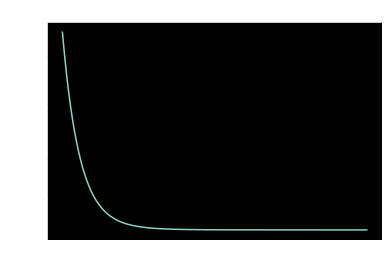

 
 
MSE : 0.9803432176143638


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


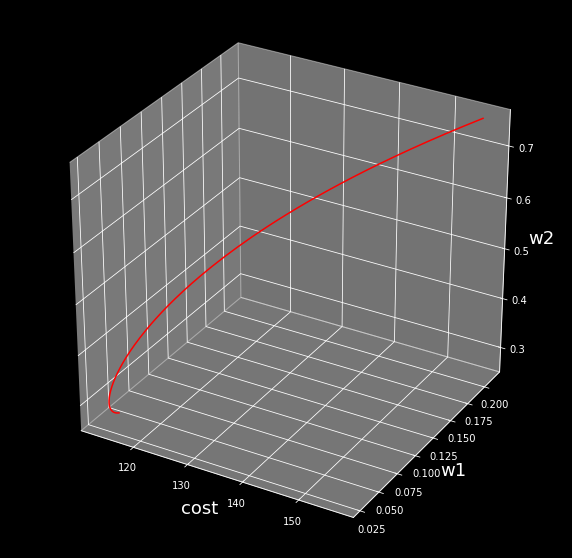

In [8]:
print("BATCH GRADIENT DESCENT")
print(" ")
w0_bgd, w1_bgd, w2_bgd, cost_bgd, w1_list_bgd, w2_list_bgd = batch_gradient_descent(x1, x2, y)
print("W0 :", w0_bgd)
print("W1 :", w1_bgd)
print("W2 :", w2_bgd)
print(" ")
plot2d("cost", "iterations", cost_bgd, "Batch-Gradient-Descent")
print(" ")
plot3d(cost_bgd, w1_list_bgd, w2_list_bgd, "cost", "w1", "w2", "Batch-Gradient-Descent")
print(" ")
mse_bgd = pred(w0_bgd, w1_bgd, w2_bgd, X1, X2, Y)
time.sleep(5)

In [9]:
def mini_batch(x1, x2, y):
    iters = 500
    batch = 5
    alpha = 0.00001
    w0 = random.uniform(0, 1)
    w1 = random.uniform(0, 1)
    w2 = random.uniform(0, 1)
    x0 = np.ones(x1.shape[0])
    # h = hypothesis(w0, w1, w2, x1, x2)
    cost = [0 for i in range(iters)]
    w0_list = [1 for i in range(iters)]
    w1_list = [1 for i in range(iters)]
    w2_list = [1 for i in range(iters)]
    for i in range(0, iters):
        temp = np.column_stack((x1, x2, y))
        np.random.shuffle(temp)
        x1, x2, y = split1(temp)
        # print(temp[:,2].shape)
        # print(x1.shape, " ", x2.shape, " ", y.shape)
        for j in range(0, batch):
            h = hypothesis(w0, w1, w2, x1, x2)
            w0 = w0 - alpha * summa(h, x0.shape[0], y, x0)
            w1 = w1 - alpha * summa(h, x1.shape[0], y, x1)
            w2 = w2 - alpha * summa(h, x2.shape[0], y, x2)
            w0_list[i] = w0
            w1_list[i] = w1
            w2_list[i] = w2
        h = hypothesis(w0, w1, w2, x1, x2)
        cost[i] = 0.5 * mse(h, y, y.shape[0])
    return w0, w1, w2, cost, w1_list, w2_list

 
 
 
MINI BATCH GRADIENT DESCENT
 
W0 : 0.00044035225442013337
W1 : 0.049178043194786775
W2 : 0.2532156341616173
 


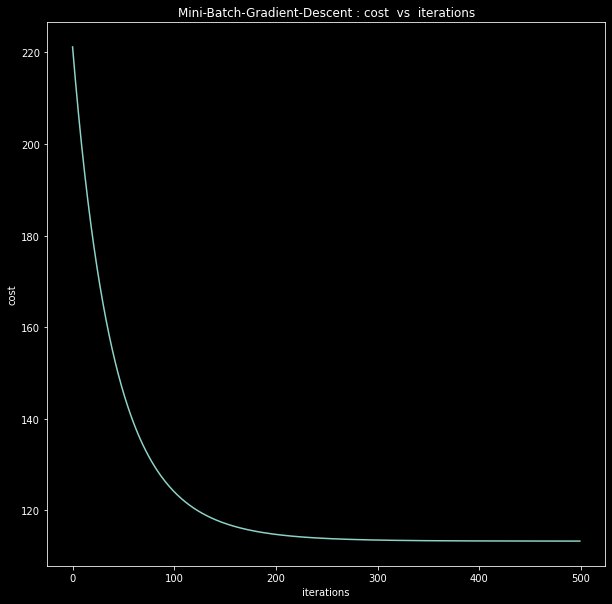

 
 
MSE : 0.9811537411562742
 
 
 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


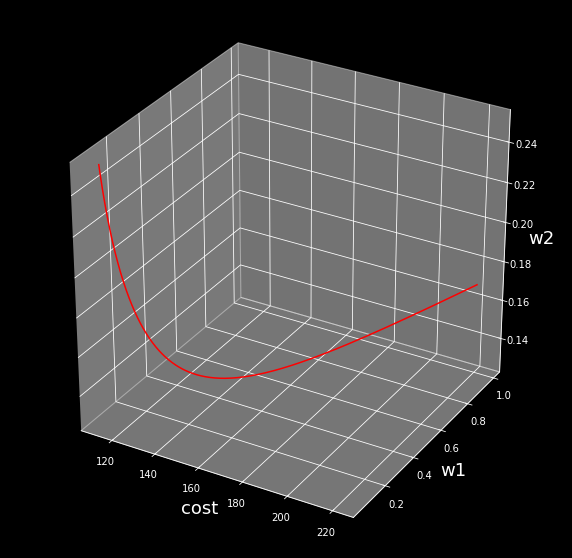

In [10]:
print(" ")
print(" ")
print(" ")
print("MINI BATCH GRADIENT DESCENT")
print(" ")
w0_mbgd, w1_mbgd, w2_mbgd, cost_mbgd, w1_list_mbgd, w2_list_mbgd = mini_batch(x1, x2, y)
print("W0 :", w0_mbgd)
print("W1 :", w1_mbgd)
print("W2 :", w2_mbgd)
print(" ")
plot2d("cost", "iterations", cost_mbgd, "Mini-Batch-Gradient-Descent")
print(" ")
plot3d(cost_mbgd, w1_list_mbgd, w2_list_mbgd, "cost", "w1", "w2", "Mini-Batch-Gradient-Descent")
print(" ")
mse_mbgd = pred(w0_mbgd, w1_mbgd, w2_mbgd, X1, X2, Y)
print(" ")
print(" ")
print(" ")
time.sleep(5)

In [11]:
def stochastic_gradient_descent(x1, x2, y):
    # batch = 15 #batch size
    alpha = 0.00001  # learning rate
    iter = 9999
    # initializing the learning rates to random values between 0 & 1
    w0 = random.uniform(0, 1)
    w1 = random.uniform(0, 1)
    w2 = random.uniform(0, 1)
    # grabbing x0 as np.ones for future use
    x0 = np.ones(x1.shape[0])
    cost = [0 for i in range(iter)]
    w0_list = [1 for i in range(iter)]
    w1_list = [1 for i in range(iter)]
    w2_list = [1 for i in range(iter)]
    h = hypothesis(w0, w1, w2, x1, x2)
    for itr in range(0, iter):
        i = random.randint(0, y.shape[0] - 1)
        w0 = w0 - alpha * ((h[i] - y[i]) * x0[i])
        w1 = w1 - alpha * ((h[i] - y[i]) * x1[i])
        w2 = w2 - alpha * ((h[i] - y[i]) * x2[i])
        w0_list[itr] = w0
        w1_list[itr] = w1
        w2_list[itr] = w2
        h = hypothesis(w0, w1, w2, x1, x2)
        cost[itr] = 0.5 * mse(h, y, y.shape[0])
    return w0, w1, w2, cost, w1_list, w2_list


 
 
 
STOCHASTIC GRADIENT DESCENT
W0 : 0.8313256339934058
W1 : 0.058168529316950414
W2 : 0.572015273160538
 


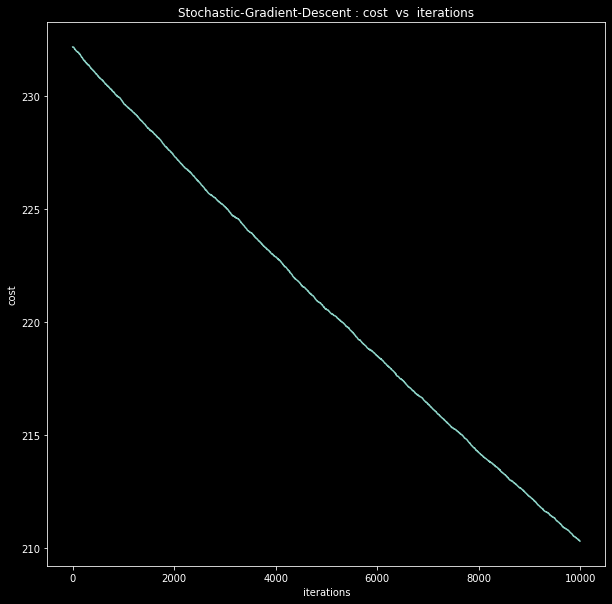

 
 
MSE : 2.7353961919165877


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


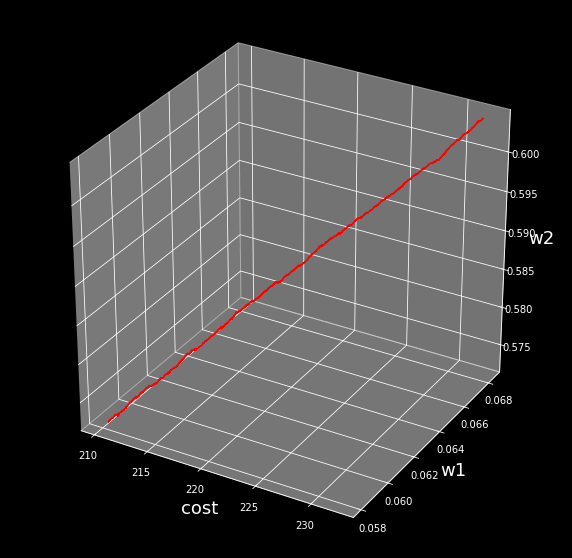

In [12]:
print(" ")
print(" ")
print(" ")
print("STOCHASTIC GRADIENT DESCENT")
w0_sgd, w1_sgd, w2_sgd, cost_sgd, w1_list_sgd, w2_list_sgd = stochastic_gradient_descent(x1, x2, y)
print("W0 :", w0_sgd)
print("W1 :", w1_sgd)
print("W2 :", w2_sgd)
print(" ")
plot2d("cost", "iterations", cost_sgd, "Stochastic-Gradient-Descent")
print(" ")
plot3d(cost_sgd, w1_list_sgd, w2_list_sgd, "cost", "w1", "w2", "Stochastic-Gradient-Descent")
print(" ")
mse_sgd = pred(w0_sgd, w1_sgd, w2_sgd, X1, X2, Y)
time.sleep(5)

In [13]:
def wsquare(w0,w1,w2):
    sum = 0
    sum = sum + w0 ** 2
    sum = sum + w1 ** 2
    sum = sum + w2 ** 2
    return sum


In [14]:
def ridge_batch_gradient_descent(x1, x2, y):
    w0 = random.uniform(0, 1)
    w1 = random.uniform(0, 1)
    w2 = random.uniform(0, 1)
    x0 = np.ones(x1.shape[0])
    iters = 300
    alpha = 0.0001
    lamb = 0.05
    h = hypothesis(w0, w1, w2, x1, x2)
    cost = [0 for i in range(iters)]
    w0_list = [1 for i in range(iters)]
    w1_list = [1 for i in range(iters)]
    w2_list = [1 for i in range(iters)]
    for i in range(0, iters):
        w0 = (1-(alpha*lamb))*w0 - alpha * summa(h, y.shape[0], y, x0)
        w1 = (1-(alpha*lamb))*w1 - alpha * summa(h, y.shape[0], y, x1)
        w2 = (1-(alpha*lamb))*w2 - alpha * summa(h, y.shape[0], y, x2)
        w0_list[i] = w0
        w1_list[i] = w1
        w2_list[i] = w2
        wsum = wsquare(w0,w1,w2)
        h = hypothesis(w0, w1, w2, x1, x2)
        cost[i] = (1 * 0.5 * mse(h, y, y.shape[0])/x1.shape[0] + lamb * wsum) * 0.5
    return w0, w1, w2, cost, w1_list, w2_list

BATCH GRADIENT DESCENT (RIDGE REGRESSION)
 
W0 : 0.0004026894499854935
W1 : 0.042185808512597026
W2 : 0.25986169254261055
 


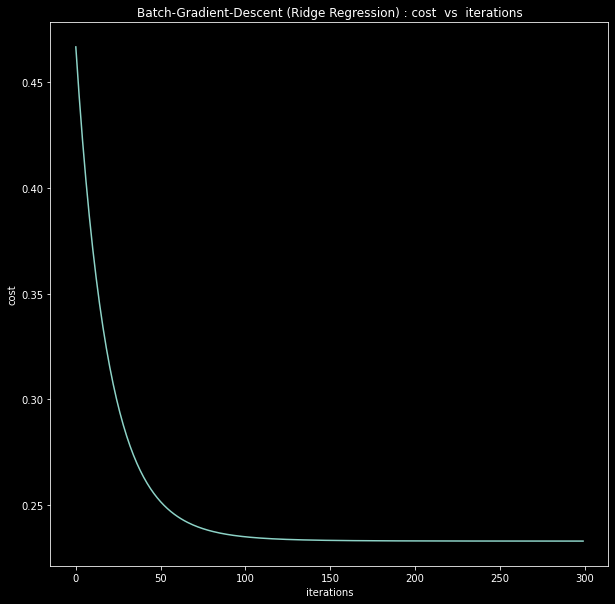

 
 
MSE : 0.9803324963470411


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


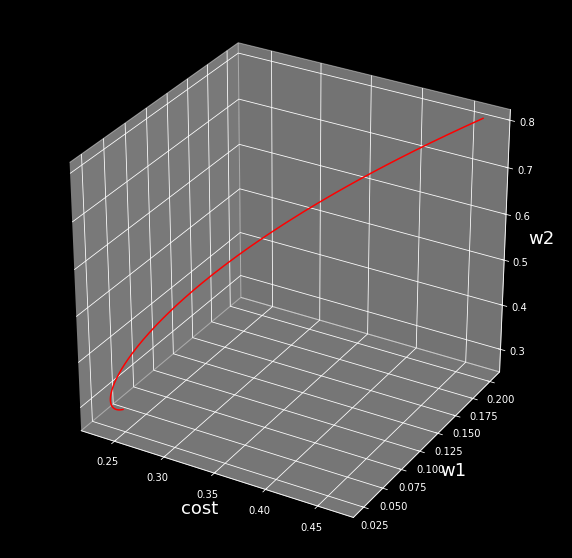

In [15]:
print("BATCH GRADIENT DESCENT (RIDGE REGRESSION)")
print(" ")
w0_r_bgd, w1_r_bgd, w2_r_bgd, cost_r_bgd, w1_list_r_bgd, w2_list_r_bgd = ridge_batch_gradient_descent(x1, x2, y)
print("W0 :", w0_r_bgd)
print("W1 :", w1_r_bgd)
print("W2 :", w2_r_bgd)
print(" ")
plot2d("cost", "iterations", cost_r_bgd, "Batch-Gradient-Descent (Ridge Regression)")
print(" ")
plot3d(cost_r_bgd, w1_list_r_bgd, w2_list_r_bgd, "cost", "w1", "w2", "Batch-Gradient-Descent (RIdge Regression)")
print(" ")
mse_r_bgd = pred(w0_r_bgd, w1_r_bgd, w2_r_bgd, X1, X2, Y)
time.sleep(5)
print(" ")
print(" ")
print(" ")

In [16]:
def ridge_mini_batch(x1, x2, y):
    iters = 500
    batch = 5
    alpha = 0.00001
    lamb = 0.05
    w0 = random.uniform(0, 1)
    w1 = random.uniform(0, 1)
    w2 = random.uniform(0, 1)
    x0 = np.ones(x1.shape[0])
    # h = hypothesis(w0, w1, w2, x1, x2)
    cost = [0 for i in range(iters)]
    w0_list = [1 for i in range(iters)]
    w1_list = [1 for i in range(iters)]
    w2_list = [1 for i in range(iters)]
    for i in range(0, iters):
        temp = np.column_stack((x1, x2, y))
        np.random.shuffle(temp)
        x1, x2, y = split1(temp)
        # print(temp[:,2].shape)
        # print(x1.shape, " ", x2.shape, " ", y.shape)
        for j in range(0, batch):
            h = hypothesis(w0, w1, w2, x1, x2)
            w0 = (1-(alpha*lamb))*w0 - alpha * summa(h, x0.shape[0], y, x0)
            w1 = (1-(alpha*lamb))*w1 - alpha * summa(h, x1.shape[0], y, x1)
            w2 = (1-(alpha*lamb))*w2 - alpha * summa(h, x2.shape[0], y, x2)
            w0_list[i] = w0
            w1_list[i] = w1
            w2_list[i] = w2
            wsum = wsquare(w0,w1,w2)
        h = hypothesis(w0, w1, w2, x1, x2)
        cost[i] = (1 * 0.5 * mse(h, y, y.shape[0])/x1.shape[0] + lamb * wsum) * 0.5
    return w0, w1, w2, cost, w1_list, w2_list


 
 
 
MINI BATCH GRADIENT DESCENT (RIDGE REGRESSION)
 
W0 : 0.0013910323859847506
W1 : 0.0453436958189973
W2 : 0.25719782753109666
 


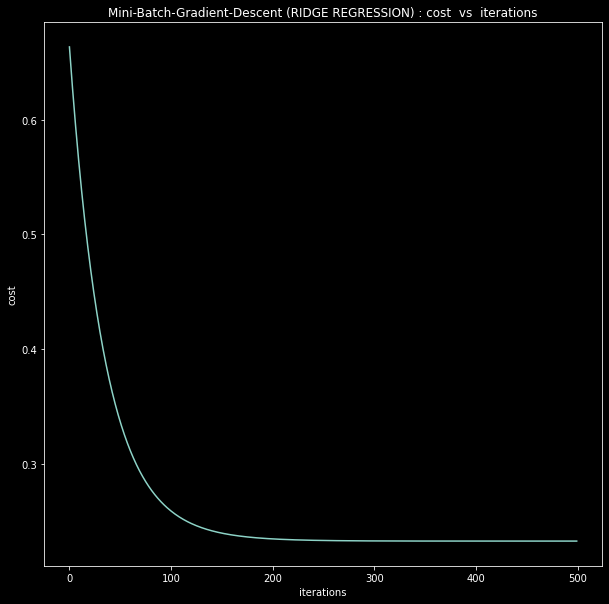

 
 
MSE : 0.9806700543591519
 
 
 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


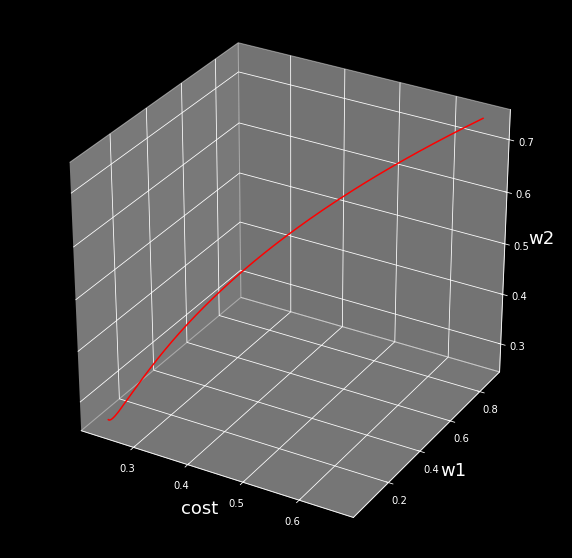

In [17]:
print(" ")
print(" ")
print(" ")
print("MINI BATCH GRADIENT DESCENT (RIDGE REGRESSION)")
print(" ")
w0_r_mbgd, w1_r_mbgd, w2_r_mbgd, cost_r_mbgd, w1_list_r_mbgd, w2_list_r_mbgd = ridge_mini_batch(x1, x2, y)
print("W0 :", w0_r_mbgd)
print("W1 :", w1_r_mbgd)
print("W2 :", w2_r_mbgd)
print(" ")
plot2d("cost", "iterations", cost_r_mbgd, "Mini-Batch-Gradient-Descent (RIDGE REGRESSION)")
print(" ")
plot3d(cost_r_mbgd, w1_list_r_mbgd, w2_list_r_mbgd, "cost", "w1", "w2", "Mini-Batch-Gradient-Descent (RIDGE REGRESSION)")
print(" ")
mse_r_mbgd = pred(w0_r_mbgd, w1_r_mbgd, w2_r_mbgd, X1, X2, Y)
print(" ")
print(" ")
print(" ")
time.sleep(5)

In [18]:
def ridge_stochastic_gradient_descent(x1, x2, y):
    # batch = 15 #batch size
    alpha = 0.00001  # learning rate
    lamb = 0.6
    iter = 9999
    # initializing the learning rates to random values between 0 & 1
    w0 = random.uniform(0, 1)
    w1 = random.uniform(0, 1)
    w2 = random.uniform(0, 1)
    # grabbing x0 as np.ones for future use
    x0 = np.ones(x1.shape[0])
    cost = [0 for i in range(iter)]
    w0_list = [1 for i in range(iter)]
    w1_list = [1 for i in range(iter)]
    w2_list = [1 for i in range(iter)]
    h = hypothesis(w0, w1, w2, x1, x2)
    for itr in range(0, iter):
        i = random.randint(0, y.shape[0] - 1)
        w0 = (1- (alpha* lamb ))* w0 - alpha * ((h[i] - y[i]) * x0[i])
        w1 = (1- (alpha* lamb ))* w1 - alpha * ((h[i] - y[i]) * x1[i])
        w2 = (1- (alpha* lamb ))* w2 - alpha * ((h[i] - y[i]) * x2[i])
        w0_list[itr] = w0
        w1_list[itr] = w1
        w2_list[itr] = w2
        wsum = wsquare(w0,w1,w2)
        h = hypothesis(w0, w1, w2, x1, x2)
        cost[itr] = (1 * 0.5 * mse(h, y, y.shape[0])/x1.shape[0] + lamb * wsum) * 0.5
    return w0, w1, w2, cost, w1_list, w2_list

 
 
 
STOCHASTIC GRADIENT DESCENT (RIDGE REGRESSION)
W0 : -4.605379764511789e-05
W1 : 0.32473267389587335
W2 : 0.557714062012163
 


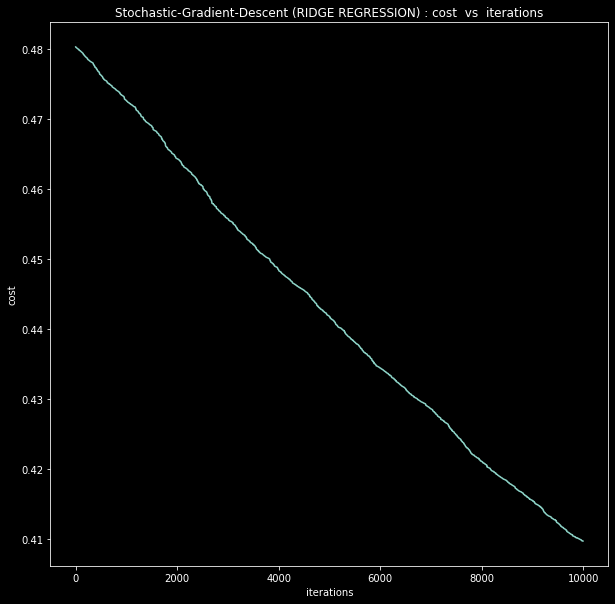

 
 
MSE : 1.1070896397080079


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


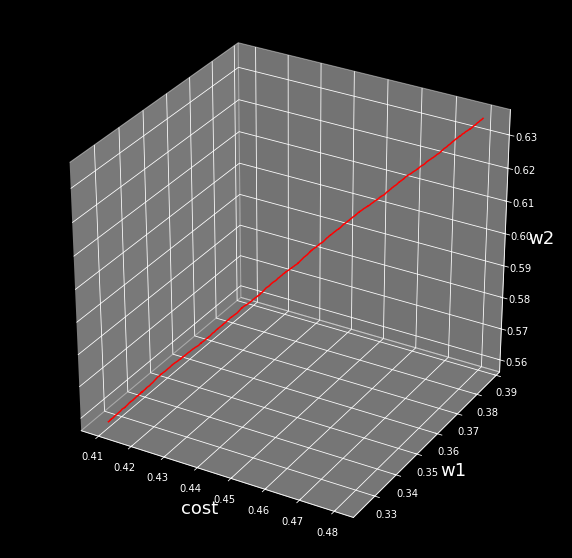

In [19]:
print(" ")
print(" ")
print(" ")
time.sleep(5)
print("STOCHASTIC GRADIENT DESCENT (RIDGE REGRESSION)")
w0_r_sgd, w1_r_sgd, w2_r_sgd, cost_r_sgd, w1_list_r_sgd, w2_list_r_sgd = ridge_stochastic_gradient_descent(x1, x2, y)
print("W0 :", w0_r_sgd)
print("W1 :", w1_r_sgd)
print("W2 :", w2_r_sgd)
print(" ")
plot2d("cost", "iterations", cost_r_sgd, "Stochastic-Gradient-Descent (RIDGE REGRESSION)")
print(" ")
plot3d(cost_r_sgd, w1_list_r_sgd, w2_list_r_sgd, "cost", "w1", "w2", "Stochastic-Gradient-Descent (RIDGE REGRESSION)")
print(" ")
mse_r_sgd = pred(w0_r_sgd, w1_r_sgd, w2_r_sgd, X1, X2, Y)
time.sleep(5)

In [20]:
def wabs(w0,w1,w2):
  w0 = abs(w0)
  w1 = abs(w1)
  w2 = abs(w2)
  return w0+w1+w2


In [21]:
def least_angle_regression_batch(x1,x2,y):
  lamb = 0.2
  alpha = 0.0005
  iter = 500
  # initializing the learning rates to random values between 0 & 1
  w0 = random.uniform(0, 1)
  w1 = random.uniform(0, 1)
  w2 = random.uniform(0, 1)
  # grabbing x0 as np.ones for future use
  x0 = np.ones(x1.shape[0])
  cost = [0 for i in range(iter)]
  w0_list = [1 for i in range(iter)]
  w1_list = [1 for i in range(iter)]
  w2_list = [1 for i in range(iter)]
  for i in range(0,iter):
    h = hypothesis(w0, w1, w2, x1, x2)
    w0 = w0 - alpha * summa(h, y.shape[0], y, x0) - alpha * lamb * np.sign(w0) * 0.5
    w1 = w1 - alpha * summa(h, y.shape[0], y, x1) - alpha * lamb * np.sign(w1) * 0.5
    w2 = w2 - alpha * summa(h, y.shape[0], y, x2) - alpha * lamb * np.sign(w2) * 0.5
    w0_list[i] = w0
    w1_list[i] = w1
    w2_list[i] = w2
    wsum = wabs(w0,w1,w2)
    cost[i] = (1 * 0.5 * mse(h, y, y.shape[0])/x1.shape[0] + lamb * wsum) * 0.5
  return w0, w1, w2, cost, w1_list, w2_list


BATCH GRADIENT DESCENT (Least Angle Regression)
 
W0 : 2.6631158456502703e-05
W1 : 0.04273185912026614
W2 : 0.25866699471771293
 


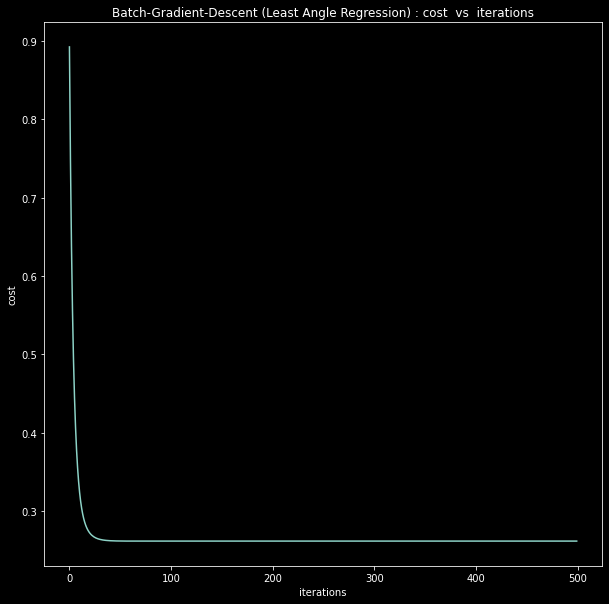

 
 
MSE : 0.980472296359873


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


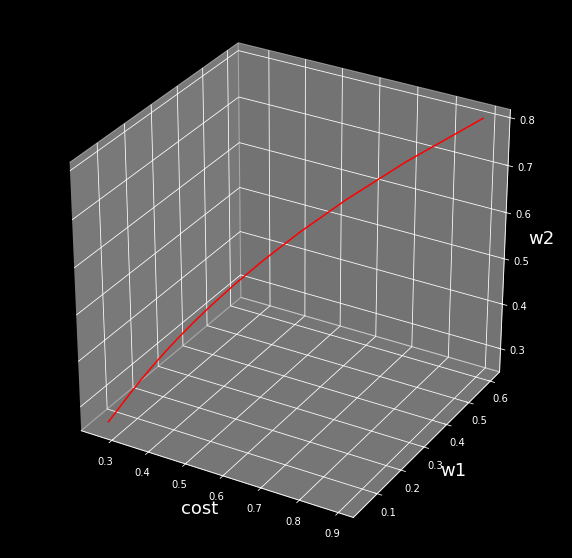

In [22]:
print("BATCH GRADIENT DESCENT (Least Angle Regression)")
print(" ")
w0_lar_bgd, w1_lar_bgd, w2_lar_bgd, cost_lar_bgd, w1_list_lar_bgd, w2_list_lar_bgd = least_angle_regression_batch(x1, x2, y)
print("W0 :", w0_lar_bgd)
print("W1 :", w1_lar_bgd)
print("W2 :", w2_lar_bgd)
print(" ")
plot2d("cost", "iterations", cost_lar_bgd, "Batch-Gradient-Descent (Least Angle Regression)")
print(" ")
plot3d(cost_lar_bgd, w1_list_lar_bgd, w2_list_lar_bgd, "cost", "w1", "w2", "Batch-Gradient-Descent (Least Angle Regression)")
print(" ")
mse_lar_bgd = pred(w0_lar_bgd, w1_lar_bgd, w2_lar_bgd, X1, X2, Y)
time.sleep(5)

In [23]:
def least_angle_mini_batch(x1, x2, y):
    iters = 500
    batch = 5
    alpha = 0.00001
    lamb = 0.05
    w0 = random.uniform(0, 1)
    w1 = random.uniform(0, 1)
    w2 = random.uniform(0, 1)
    x0 = np.ones(x1.shape[0])
    # h = hypothesis(w0, w1, w2, x1, x2)
    cost = [0 for i in range(iters)]
    w0_list = [1 for i in range(iters)]
    w1_list = [1 for i in range(iters)]
    w2_list = [1 for i in range(iters)]
    for i in range(0, iters):
        temp = np.column_stack((x1, x2, y))
        np.random.shuffle(temp)
        x1, x2, y = split1(temp)
        # print(temp[:,2].shape)
        # print(x1.shape, " ", x2.shape, " ", y.shape)
        for j in range(0, batch):
            h = hypothesis(w0, w1, w2, x1, x2)
            w0 = w0 - alpha * summa(h, y.shape[0], y, x0) - alpha * lamb * np.sign(w0) * 0.5
            w1 = w1 - alpha * summa(h, y.shape[0], y, x1) - alpha * lamb * np.sign(w1) * 0.5
            w2 = w2 - alpha * summa(h, y.shape[0], y, x2) - alpha * lamb * np.sign(w2) * 0.5
            w0_list[i] = w0
            w1_list[i] = w1
            w2_list[i] = w2
            wsum = wsquare(w0,w1,w2)
        h = hypothesis(w0, w1, w2, x1, x2)
        cost[i] = (1 * 0.5 * mse(h, y, y.shape[0])/x1.shape[0] + lamb * wsum) * 0.5
    return w0, w1, w2, cost, w1_list, w2_list

MINI BATCH GRADIENT DESCENT (Least Angle Regression)
 
W0 : 0.0012427003320609864
W1 : 0.04546481028779156
W2 : 0.25683064418697543
 


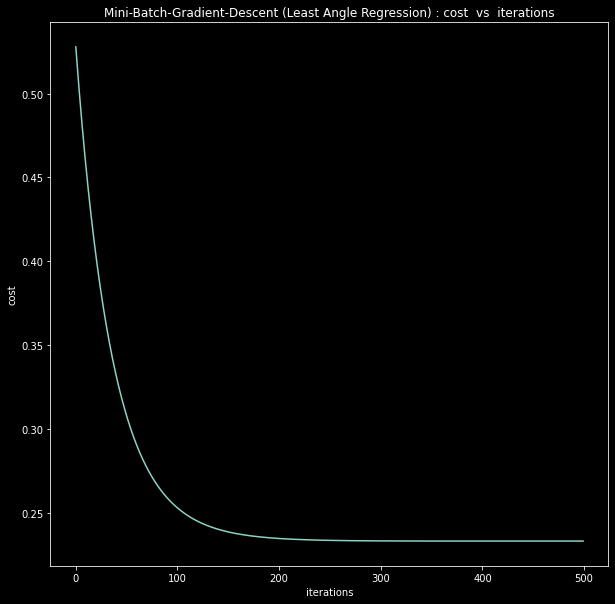

 
 
MSE : 0.9807117349858937
 
 
 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


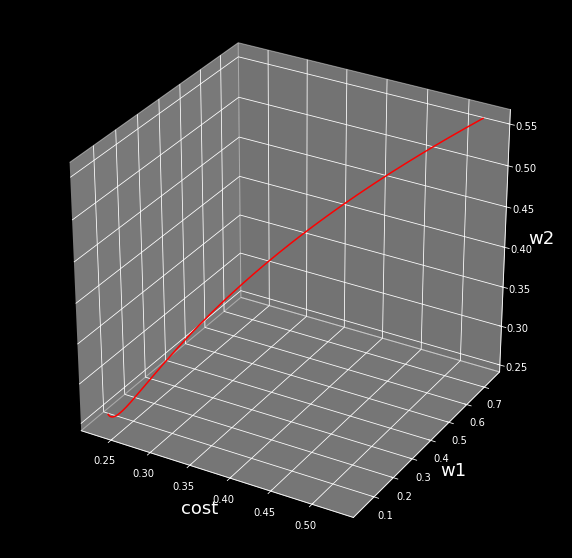

In [24]:
print("MINI BATCH GRADIENT DESCENT (Least Angle Regression)")
print(" ")
w0_lar_mbgd, w1_lar_mbgd, w2_lar_mbgd, cost_lar_mbgd, w1_list_lar_mbgd, w2_list_lar_mbgd = least_angle_mini_batch(x1, x2, y)
print("W0 :", w0_lar_mbgd)
print("W1 :", w1_lar_mbgd)
print("W2 :", w2_lar_mbgd)
print(" ")
plot2d("cost", "iterations", cost_lar_mbgd, "Mini-Batch-Gradient-Descent (Least Angle Regression)")
print(" ")
plot3d(cost_lar_mbgd, w1_list_lar_mbgd, w2_list_lar_mbgd, "cost", "w1", "w2", "Mini-Batch-Gradient-Descent (Least Angle Regression)")
print(" ")
mse_lar_mbgd = pred(w0_lar_mbgd, w1_lar_mbgd, w2_lar_mbgd, X1, X2, Y)
print(" ")
print(" ")
print(" ")
time.sleep(5)

In [25]:
def least_angle_stochastic_gradient_descent(x1, x2, y):
    # batch = 15 #batch size
    alpha = 0.00001  # learning rate
    lamb = 0.09
    iter = 9999
    # initializing the learning rates to random values between 0 & 1
    w0 = random.uniform(0, 1)
    w1 = random.uniform(0, 1)
    w2 = random.uniform(0, 1)
    # grabbing x0 as np.ones for future use
    x0 = np.ones(x1.shape[0])
    cost = [0 for i in range(iter)]
    w0_list = [1 for i in range(iter)]
    w1_list = [1 for i in range(iter)]
    w2_list = [1 for i in range(iter)]
    h = hypothesis(w0, w1, w2, x1, x2)
    for itr in range(0, iter):
        i = random.randint(0, y.shape[0] - 1)
        w0 = w0 - alpha * summa(h, y.shape[0], y, x0) - alpha * lamb * np.sign(w0) * 0.5
        w1 = w1 - alpha * summa(h, y.shape[0], y, x1) - alpha * lamb * np.sign(w1) * 0.5
        w2 = w2 - alpha * summa(h, y.shape[0], y, x2) - alpha * lamb * np.sign(w2) * 0.5
        w0_list[itr] = w0
        w1_list[itr] = w1
        w2_list[itr] = w2
        wsum = wabs(w0,w1,w2)
        h = hypothesis(w0, w1, w2, x1, x2)
        cost[itr] = (1 * 0.5 * mse(h, y, y.shape[0])/x1.shape[0] + lamb * wsum) * 0.5
    return w0, w1, w2, cost, w1_list, w2_list

 
 
 
STOCHASTIC GRADIENT DESCENT (Least Angle Regression)
W0 : -2.2527595332879762e-07
W1 : 0.04290841079511933
W2 : 0.2588435495144312
 


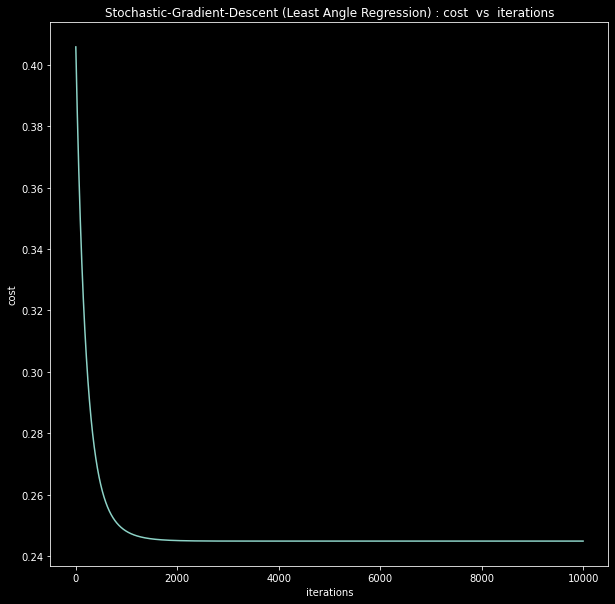

 
 
MSE : 0.9804546482932696


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


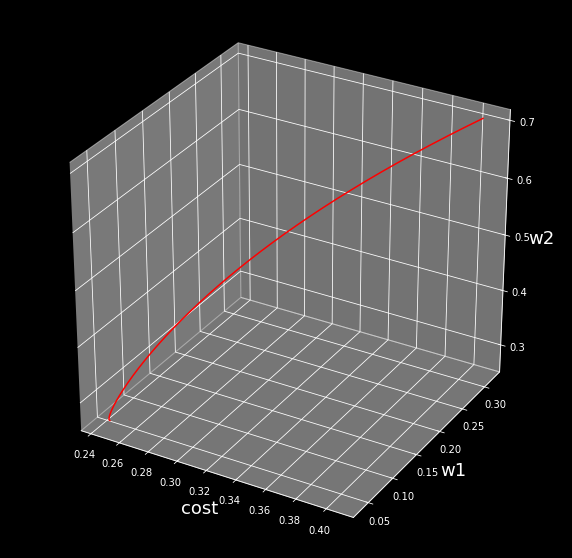

In [26]:
print(" ")
print(" ")
print(" ")
time.sleep(5)
print("STOCHASTIC GRADIENT DESCENT (Least Angle Regression)")
w0_lar_sgd, w1_lar_sgd, w2_lar_sgd, cost_lar_sgd, w1_list_lar_sgd, w2_list_lar_sgd = least_angle_stochastic_gradient_descent(x1, x2, y)
print("W0 :", w0_lar_sgd)
print("W1 :", w1_lar_sgd)
print("W2 :", w2_lar_sgd)
print(" ")
plot2d("cost", "iterations", cost_lar_sgd, "Stochastic-Gradient-Descent (Least Angle Regression)")
print(" ")
plot3d(cost_lar_sgd, w1_list_lar_sgd, w2_list_lar_sgd, "cost", "w1", "w2", "Stochastic-Gradient-Descent (Least Angle Regression)")
print(" ")
mse_lar_sgd = pred(w0_lar_sgd, w1_lar_sgd, w2_lar_sgd, X1, X2, Y)
time.sleep(5)

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import time
from tabulate import tabulate

In [28]:
def hypothesis_v(theta, X, Y):
  h = (np.matmul(X, theta))
  for i in range(0, h.shape[0]):
      h[i] = h[i]-Y[i]
  return h

In [29]:
def batch_gradient_descent_vi(x, y, w):
    iters = 300
    cost = [0 for i in range(iters)]
    w_list = np.ones(shape = (iters,w.shape[1]))
    y = y.reshape(245,1)
    w = w.T
    for i in range(0,iters):
        w = np.linalg.inv(x.T @ x) @ x.T @ y
    return w

In [30]:
def ridge_batch_gradient_descent_vi(x, y, w):
    iters = 300
    lamb = 0.05
    cost = [0 for i in range(iters)]
    w_list = np.ones(shape = (iters,w.shape[1]))
    y = y.reshape(245,1)
    w = w.T
    for i in range(0,iters):
        w = np.linalg.inv((x.T @ x) + (lamb * np.identity(3)) ) @ x.T @ y
    return w

In [31]:
def least_angle_batch_gradient_descent_vi(x, y, w):
    iters = 300
    lamb = 0.2
    cost = [0 for i in range(iters)]
    w_list = np.ones(shape = (iters,w.shape[1]))
    y = y.reshape(245,1)
    w = w.T
    for i in range(0,iters):
        w = np.linalg.inv(x.T @ x) @ ( x.T @ y - ( lamb/2 * np.sign(w) ) )
    return w

In [32]:
def batch_gradient_descent_v(x, y, w):
  theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)), x.T), y)
  k = np.matmul(x, theta)
  k = y - k
  temp = k.T
  cost = (np.matmul(temp, k) *0.5 )/x.shape[0]
  return theta,cost

In [33]:
def plot3d_v(x, axis, label1, label2, label3, title):
    fig = plt.figure()
    plt.style.use('dark_background')
    plt.title(title + " : " + label1 + "  vs  " + label2 + " vs "+ label3)
    plt.rcParams["figure.figsize"] = (10, 10)
    ax = plt.axes(projection='3d')
    ax.plot3D(x, axis[:,1], axis[:,2], 'red')
    ax.set_xlabel(label1, fontsize=18)
    ax.set_ylabel(label2, fontsize=18)
    ax.set_zlabel(label3, fontsize=18)

In [34]:
def pred_v(w, X, Y):
    pred = hypothesis_v(w, X, Y)
    mean = np.mean(pred.transpose())
    sdev = np.std(pred.transpose())
    # print(mean)
    # print(sdev)
    pred = pred * sdev + mean
    err = 0
    for i in range(0, pred.shape[0]):
        err = err + (pred[i] - Y[i]) ** 2
    err = err / pred.shape[0]
    #print("MSE :", err)
    return err

In [35]:
x0 = np.ones(x1.shape)
X_train = np.column_stack((x0, x1, x2))
X0 = np.ones(X1.shape)
X_test = np.column_stack((X0,X1,X2))
w = np.random.randn(1, 3)
print("LINEAR REGRESSION ")
print(" ")
w_v_bgd = batch_gradient_descent_vi(X_train, y, w)
mse_v_bgd = pred_v(w_v_bgd, X_test, Y)
bgd_table = [["W0",w_v_bgd[0],w0_bgd,w0_mbgd,w0_sgd],["W1",w_v_bgd[1],w1_bgd,w1_mbgd,w1_sgd],["W2",w_v_bgd[2],w2_bgd,w2_mbgd,w2_sgd],["MSE",mse_v_bgd,mse_bgd,mse_mbgd,mse_sgd]]
print(tabulate(bgd_table,headers = ["Quantities","BGD-Vectorized","BGD","MBGD","SGD"],tablefmt="pretty"))
print("")
print(" ")
print(" ")
print("RIDGE REGRESSION")
print(" ")
w_r_v_bgd = ridge_batch_gradient_descent_vi(X_train, y, w)
mse_r_v_bgd = pred_v(w_r_v_bgd, X_test, Y)
bgd_table = [["W0",w_r_v_bgd[0],w0_r_bgd,w0_r_mbgd,w0_r_sgd],["W1",w_r_v_bgd[1],w1_r_bgd,w1_r_mbgd,w1_r_sgd],["W2",w_r_v_bgd[2],w2_r_bgd,w2_r_mbgd,w2_r_sgd],["MSE",mse_r_v_bgd,mse_r_bgd,mse_r_mbgd,mse_r_sgd]]
print(tabulate(bgd_table,headers = ["Quantities","Ridge-Vectorized","Ridge-BGD","Ridge-MBGD", "Ridge-SGD"],tablefmt="pretty"))
print(" ")
print(" ")
print("LEAST ANGLE REGRESSION")
print(" ")
w_lar_v_bgd = least_angle_batch_gradient_descent_vi(X_train, y, w)
mse_lar_v_bgd = pred_v(w_lar_v_bgd, X_test, Y)
bgd_table = [["W0",w_lar_v_bgd[0],w0_lar_bgd,w0_lar_mbgd,w0_lar_sgd],["W1",w_lar_v_bgd[1],w1_lar_bgd,w1_lar_mbgd,w1_lar_sgd],["W2",w_lar_v_bgd[2],w2_lar_bgd,w2_lar_mbgd,w2_lar_sgd],["MSE",mse_lar_v_bgd,mse_lar_bgd,mse_lar_mbgd,mse_lar_sgd]]
print(tabulate(bgd_table,headers = ["Quantities","Least Angle - Vectorization","Least Angle - BGD","Least Angle - MBGD","Least Angle - SGD"],tablefmt="pretty"))
#print(cost)
#print(" ")
#plot2d("cost", "iterations", cost, "Batch-Gradient-Descent")
#print(" ")
#plot3d_v(cost, w_list, "cost", "w1", "w2", "Batch-Gradient-Descent")
#print(" ")


LINEAR REGRESSION 
 
+------------+------------------+------------------------+------------------------+----------------------+
| Quantities |  BGD-Vectorized  |          BGD           |          MBGD          |         SGD          |
+------------+------------------+------------------------+------------------------+----------------------+
|     W0     | [1.17961196e-15] | 0.00010293876691072723 | 0.00044035225442013337 |  0.8313256339934058  |
|     W1     |   [0.04305287]   |  0.042315152214087666  |  0.049178043194786775  | 0.058168529316950414 |
|     W2     |    [0.258988]    |   0.2597774857928291   |   0.2532156341616173   |  0.572015273160538   |
|    MSE     |   [3.85222457]   |   0.9803432176143638   |   0.9811537411562742   |  2.7353961919165877  |
+------------+------------------+------------------------+------------------------+----------------------+

 
 
RIDGE REGRESSION
 
+------------+------------------+-----------------------+-----------------------+------------------

[[7.8        3.8        6.55       2.1       ]
 [6.37710843 2.91204819 5.08313253 1.7626506 ]
 [5.10153846 3.21230769 1.98153846 0.45076923]]


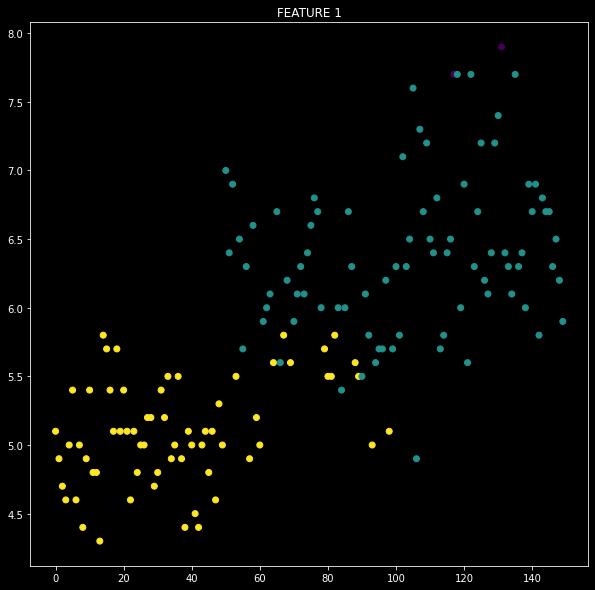

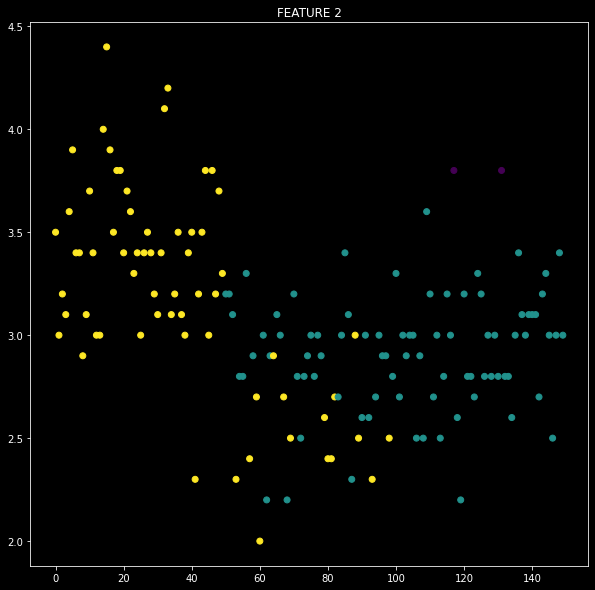

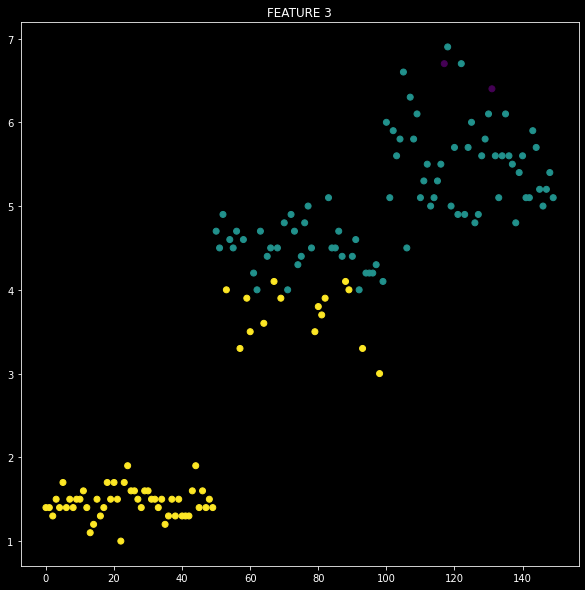

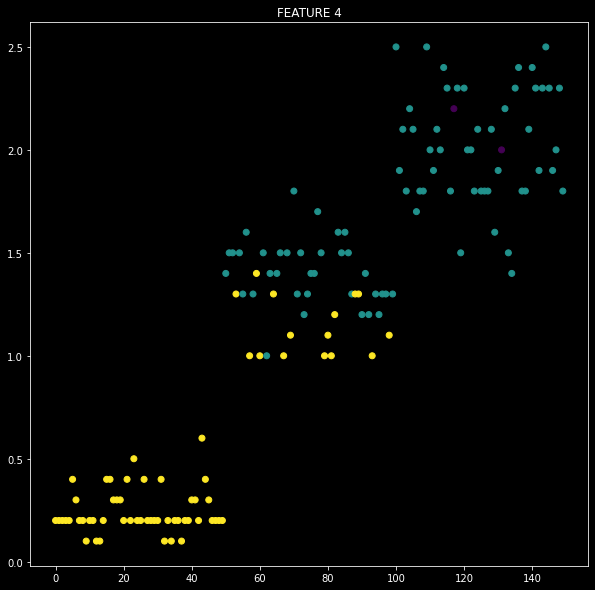

In [36]:
#Method to find the euclidean distance between centroid and points 
def distance(data, centroid):
    return np.sqrt(np.sum((data-centroid)**2))
def cluster(item,centroids):
    a = distance(item,centroids[0])
    b = distance(item,centroids[1])
    c = distance(item,centroids[2])
    if  min(a,b,c)==a:
      return 0
    elif min(a,b,c)==b:
      return 1
    else :
      return 2

def KMeansCluster(X, k):
  #    Taking 2 random points as centriod as the number of clusters is 2
  random_indices = np.random.choice(len(X), 3)
  #    Intitalising the centroids
  centroids = X[random_indices]
  #    Initialising the number of iterations
  iters = 1000
  clusters = np.zeros(len(X))

  #    Clustering the points into cluster 1 if the distance between 
  #    the point and centroid 1  is less than distance between 
  #    the point and centroid 2 

  for it in range(iters):
    for i in range(len(X)):
      clusters[i] = cluster(X[i], centroids)
      #if distance(X[i], centroids[0]) < distance(X[i], centroids[1]) :
      #	clusters[i] = 0
      #else:
      #	clusters[i] = 1

  for i in range(k):
    pts = [X[j] for j in range(len(X)) if clusters[j] == i]
    centroids[i] = np.mean(pts, axis = 0)

  return centroids, clusters
    

#Reading the data from the file  
dataframe = pd.read_csv('data2.csv', header = None )

# Dividing into feature vectors 
dataframe.columns = ['x1', 'x2', 'x3', 'x4']
feature1 = dataframe['x1'].values
feature2 = dataframe['x2'].values
feature3 = dataframe['x3'].values
feature4 = dataframe['x4'].values

#Naming the columns of the feature matrix 
X = np.array( list(zip (feature1, feature2, feature3, feature4 )) )
# initialising Number of Clusters 
k = 3 

centroids, clusters =  KMeansCluster(X, k)
print(centroids)

#Plotting the graphs seaprately for the respective features 
plt.figure()
plt.scatter(np.arange(len(X)), X[:, 0],c = clusters.flatten())
plt.title('FEATURE 1')
plt.show()
plt.figure()
plt.scatter(np.arange(len(X)), X[:, 1],c = clusters.flatten())
plt.title('FEATURE 2')
plt.show()
plt.figure()
plt.scatter(np.arange(len(X)), X[:, 2],c = clusters.flatten())
plt.title('FEATURE 3')
plt.show()
plt.figure()
plt.scatter(np.arange(len(X)), X[:, 3],c = clusters.flatten())
plt.title('FEATURE 4')
plt.show()

In [37]:
import pandas as pd
import numpy as np
import random

#Sigmoid function for the calculation of the g(z)
def sigmoid(z):
    return 1/(1 + np.exp(-z))

#reading the file
data = pd.read_csv('data3.csv', header = None )

#Adding a colums of ones
data= np.concatenate((np.ones(shape = (data.shape[0],1)),data) ,axis = 1)
data = pd.DataFrame(data)

#Labelling th data for future use
data.columns = ['x0', 'x1', 'x2', 'x3', 'x4', 'y']

#NORMALIZING THE FEATURE MATRIX
norma = data.iloc[ :,1:-1]
data.iloc[ :,1:-1] = (norma - norma.mean() ) / norma.std()

#initializing the initial theta values with noramlised random values
Theta = np.random.randn(1,5).ravel()
#Taking the learning rate Alpha to be 0.004
alpha = 0.004

# Taking 60 % as training data and 40% as testing data
train = data.sample(frac=0.6,random_state=random.randint(1,1000))
#droping the training samples from the data dataframe for the testing samples
test = data.drop(train.index)

#Preparing the training data ( separating from the class label )
X = np.array(train.loc[:,['x0', 'x1', 'x2', 'x3', 'x4']])
# Training class data
Y = np.array(train['y'])
m = Y.shape[0]
Theta = Theta.reshape(1,5)
#Subtracting to make it binary classes ( 0 or 1 )
for i in range(len(Y)):
    Y[i] -= 1
# Taking the number of iterations to be 700
Y = Y.reshape(60,1)
for i in range(700):
#    Finding the value of z
    z =np.matmul(X,Theta.T)
#    Putting it in the calculate the value of h(Z)
    h = sigmoid(z)
#    Calculating the gradient
    gradient = (np.matmul(X.T, (h-Y))) / m
#    Updating the Theta values
    Theta-= alpha*gradient.T

#Calculating the required values for the testing set
X = np.array(test.loc[:,['x0', 'x1', 'x2', 'x3', 'x4']])
Y = np.array(test['y'])
z = np.dot(X, Theta.T)
h = sigmoid(z)
m = Y.shape[0]

#Converting into binary classes
for i in range(len(Y)):
    Y[i] -= 1


#True positives , False positives , true negatives , False negatives
tp, fp, tn, fn = 0, 0, 0, 0
for index in range(m):
#    If the h(z) value > 0.5 Belongs to class 1
#    Else belongs to class 0
    if (h[index] > 0.5):
        a = 1
    else :
        a= 0
#   Calculating the where it calssified correctly or not
    if(a == Y[index]):
        if(a == 0):
            tp += 1
        else:
            tn += 1
    else:
        if(a == 0):
            fp += 1
        else:
            fn += 1
#Printing the values
accuracy = (tp+tn) / (tp+tn+fp+fn)
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp )
print ( " Accuracy     = " , accuracy , "\n Sensitivity  = " , sensitivity ,"\n Specificity  = ",specificity )

 Accuracy     =  0.875 
 Sensitivity  =  0.75 
 Specificity  =  1.0


In [38]:
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)
reg.score(X, y)

1.0